## Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 


In [1]:
#import necessary libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score,GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, roc_auc_score, plot_roc_curve

from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

In [3]:
#importing the dataset into dataframes
df = pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#checking the number of rows and columns
df.shape

(614, 13)

In [4]:
#checking the dataset to have a clear statistical analysis on data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
print(df.columns)

df.dtypes

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [153]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [18]:
for i in df.columns:
    print(df[i].value_counts())
    print('*'*60)

LP002974    1
LP002197    1
LP002626    1
LP001608    1
LP002036    1
           ..
LP002362    1
LP002842    1
LP001824    1
LP001469    1
LP001528    1
Name: Loan_ID, Length: 614, dtype: int64
************************************************************
Male      489
Female    112
Name: Gender, dtype: int64
************************************************************
Yes    398
No     213
Name: Married, dtype: int64
************************************************************
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
************************************************************
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
************************************************************
No     500
Yes     82
Name: Self_Employed, dtype: int64
************************************************************
2500    9
6000    6
2600    6
4583    6
4166    5
       ..
5503    1
3450    1
2425    1
2423    1
4095    1
Name: ApplicantIncome, Leng

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

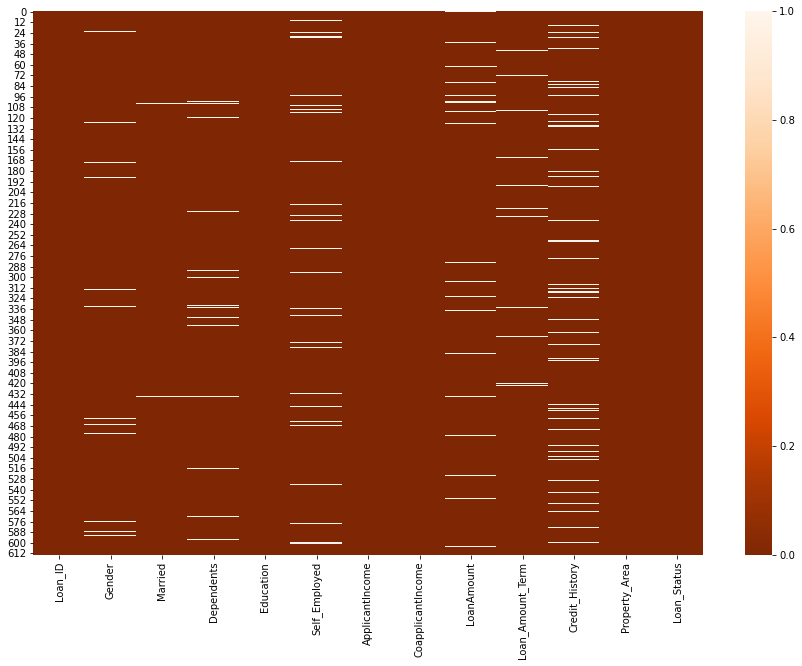

In [15]:
plt.figure(figsize=(15,10), facecolor='white')
sns.heatmap(df.isnull(), cmap='Oranges_r')
plt.show()

There are some null values available in following attributes: Gender, Married, Dependents, Self_employed, Loan Amount, Loan amount term, Credit History. These attributes need to be treated for removal of outliers.


## Univariate Analysis

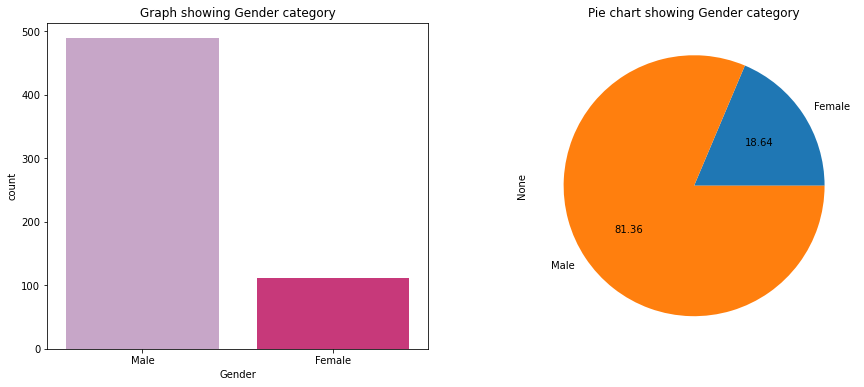

In [146]:
plt.figure(figsize=(15,6), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(df['Gender'],palette= 'PuRd')
plt.title('Graph showing Gender category')

ax = plt.subplot(1,2,2)
df.groupby('Gender').size().plot(kind='pie',autopct='%.2f')
plt.title('Pie chart showing Gender category')

plt.show()

The ratio of male to female is too large, i.e, number of males taking the loan is higher than females.

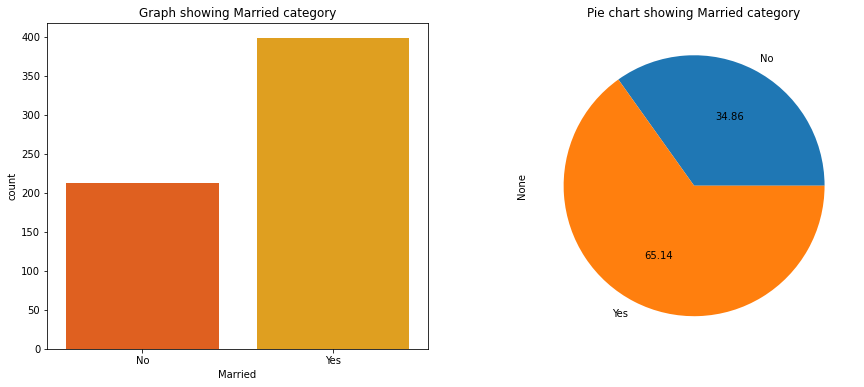

In [145]:
plt.figure(figsize=(15,6), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(df['Married'],palette= 'autumn')
plt.title('Graph showing Married category')

ax = plt.subplot(1,2,2)
df.groupby('Married').size().plot(kind='pie',autopct='%.2f')
plt.title('Pie chart showing Married category')

plt.show()

The number of applicants who are married took more loan than that of Unmarried.

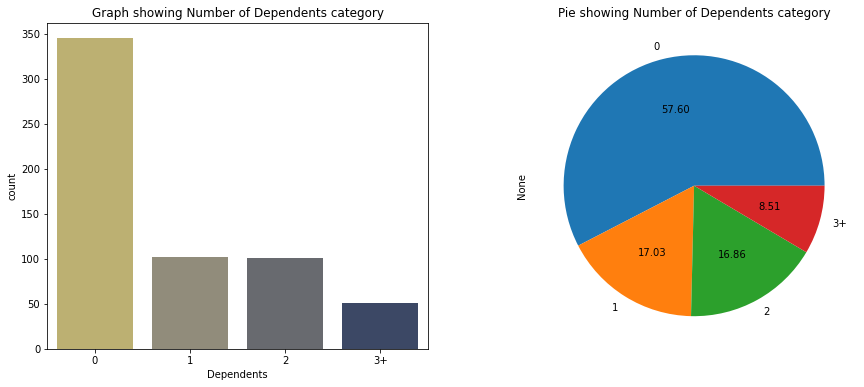

In [144]:
plt.figure(figsize=(15,6), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(df['Dependents'],palette= 'cividis_r')
plt.title('Graph showing Number of Dependents category')

ax = plt.subplot(1,2,2)
df.groupby('Dependents').size().plot(kind='pie',autopct='%.2f')
plt.title('Pie showing Number of Dependents category')

plt.show()

Number of independent applicants are more than those who have dependents.

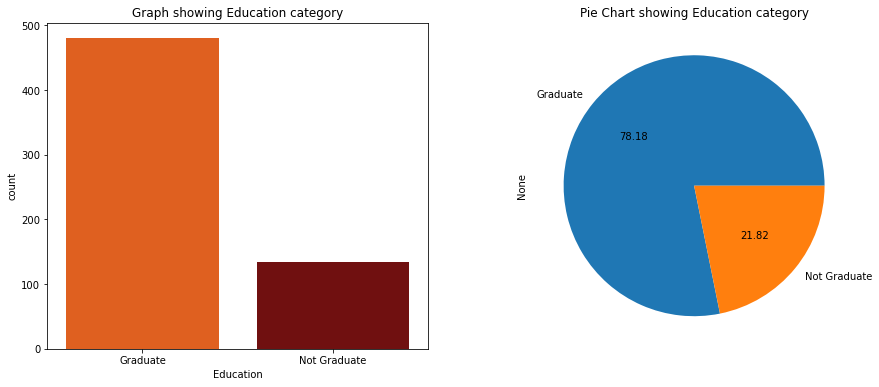

In [147]:
plt.figure(figsize=(15,6), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(df['Education'],palette= 'gist_heat_r')
plt.title('Graph showing Education category')

ax = plt.subplot(1,2,2)
df.groupby('Education').size().plot(kind='pie',autopct='%.2f')
plt.title('Pie Chart showing Education category')

plt.show()

High number of graduates applied loan than compared to that of non-graduates.

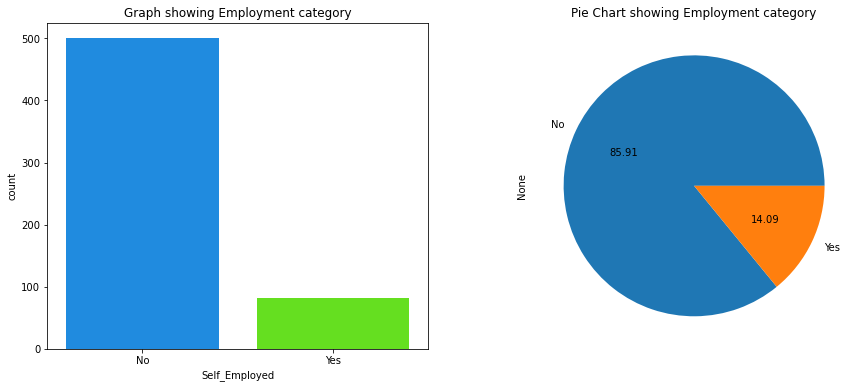

In [148]:
plt.figure(figsize=(15,6), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(df['Self_Employed'],palette= 'gist_rainbow_r')
plt.title('Graph showing Employment category')

ax = plt.subplot(1,2,2)
df.groupby('Self_Employed').size().plot(kind='pie',autopct='%.2f')
plt.title('Pie Chart showing Employment category')

plt.show()

85% of loan people who applied for loan are working for other firms: (may be IT, Govt etc) than those of self employed personel.

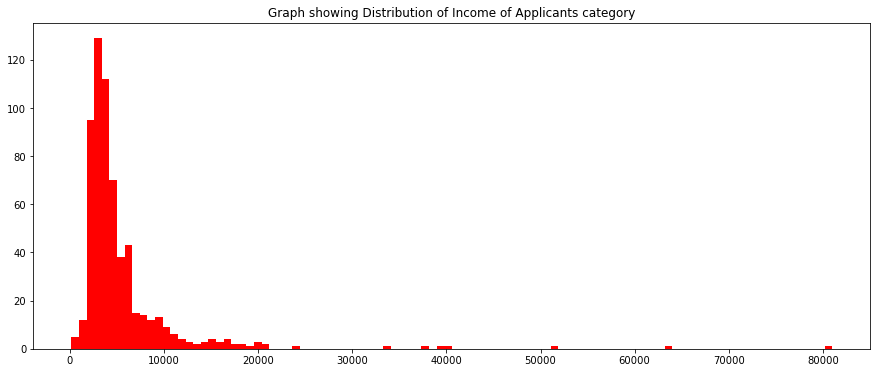

In [58]:
plt.figure(figsize=(15,6), facecolor='white')
plt.hist(df['ApplicantIncome'], bins=100,color='red')

plt.xticks()
plt.title('Graph showing Distribution of Income of Applicants category')
plt.show()

Average income of people who applied for loan has average mean of 4k to 10k salary

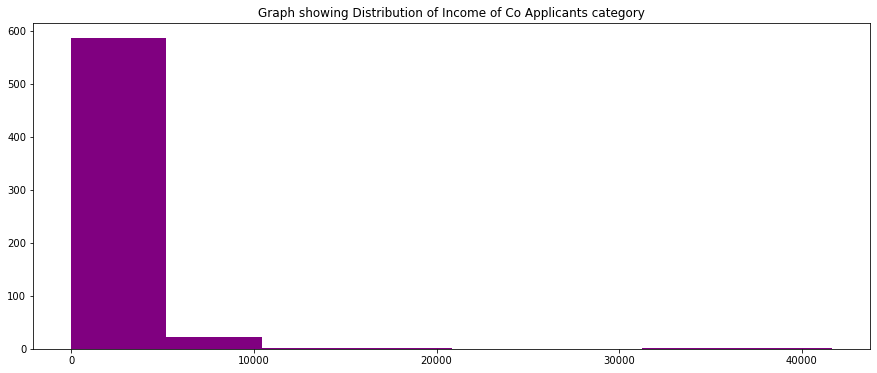

In [127]:
plt.figure(figsize=(15,6), facecolor='white')
plt.hist(df['CoapplicantIncome'], bins=8, color='purple')

plt.title('Graph showing Distribution of Income of Co Applicants category')
plt.show()

Most of co-applicants who took loan have zero income.

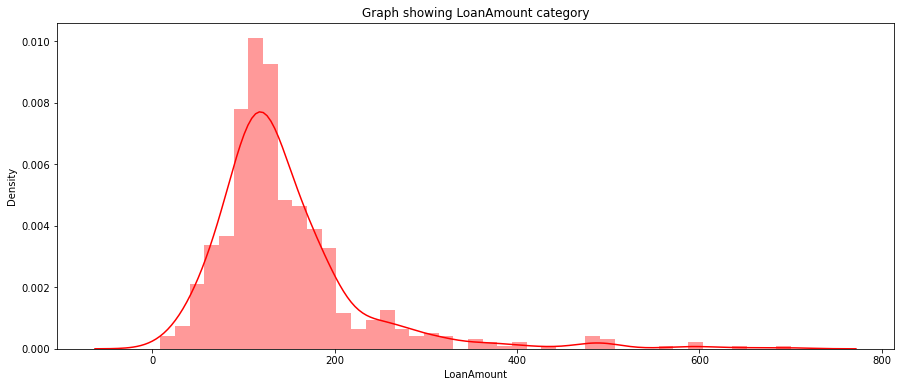

In [124]:
plt.figure(figsize=(15,6), facecolor='white')
sns.distplot(df['LoanAmount'], color='red')
plt.title('Graph showing LoanAmount category')
plt.show()

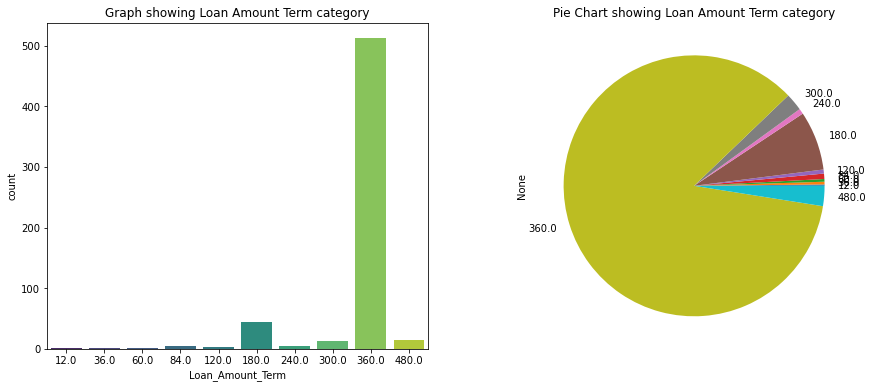

In [149]:
plt.figure(figsize=(15,6), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(df['Loan_Amount_Term'], palette='viridis')
plt.title('Graph showing Loan Amount Term category')

ax = plt.subplot(1,2,2)
df.groupby('Loan_Amount_Term').size().plot(kind='pie')
plt.title('Pie Chart showing Loan Amount Term category')

plt.show()

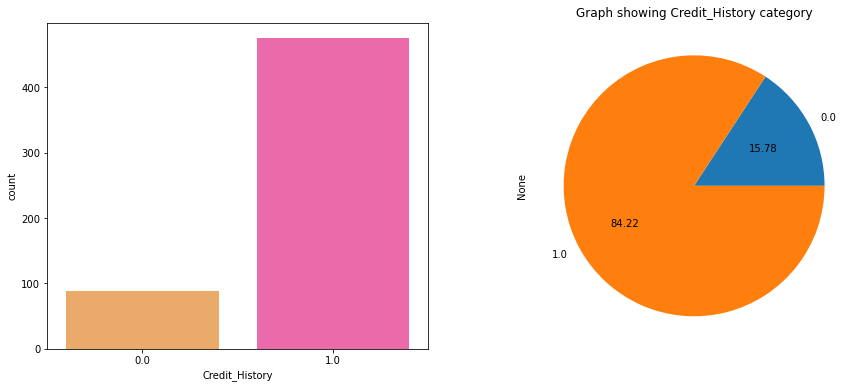

In [114]:
plt.figure(figsize=(15,6), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(df['Credit_History'], palette='spring_r')
plt.title('Graph showing Credit_History category')

ax = plt.subplot(1,2,2)
df.groupby('Credit_History').size().plot(kind='pie',autopct='%.2f')
plt.title('Pie chart showing Credit_History category')

plt.show()

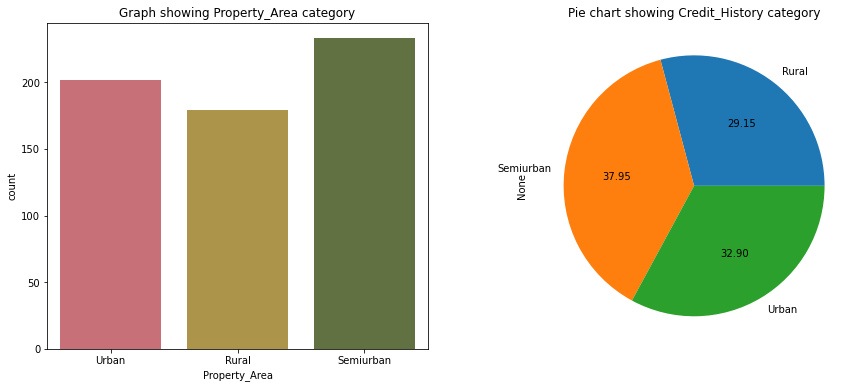

In [158]:
plt.figure(figsize=(15,6), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(df['Property_Area'], palette='tab20b_r')
plt.title('Graph showing Property_Area category')

ax = plt.subplot(1,2,2)
df.groupby('Property_Area').size().plot(kind='pie',autopct='%.2f')
plt.title('Pie chart showing Credit_History category')

plt.show()

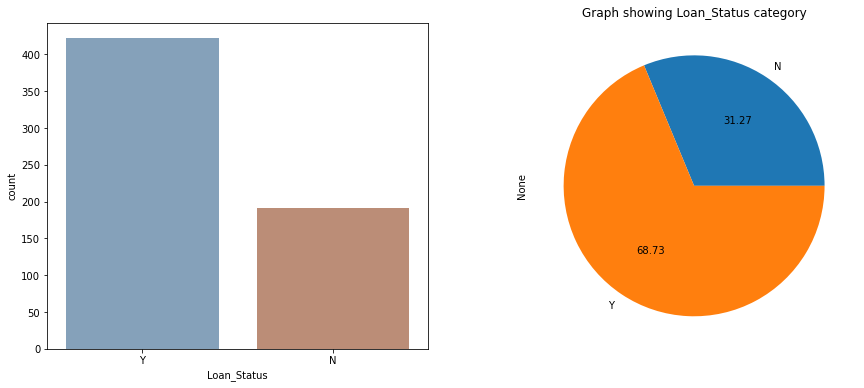

In [136]:
plt.figure(figsize=(15,6), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(df['Loan_Status'], palette='twilight_shifted')

ax = plt.subplot(1,2,2)
df.groupby('Loan_Status').size().plot(kind='pie',autopct='%.2f')
plt.title('Graph showing Loan_Status category')

plt.show()

The loan status of applicatants in the dataset is not balanced, Most of loan applications came from Semi-Urban areas followed by Urban then rural areas wrt property areas.

## Bi-variate Analysis

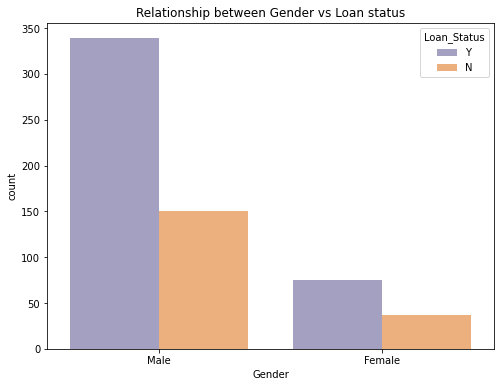

In [210]:
plt.figure(figsize=(8,6), facecolor='white')
sns.countplot(x='Gender',hue='Loan_Status', data=df, palette='tab20c_r')
plt.title('Relationship between Gender vs Loan status')
plt.show()

The highest number of applications got approved and rejected is from male.

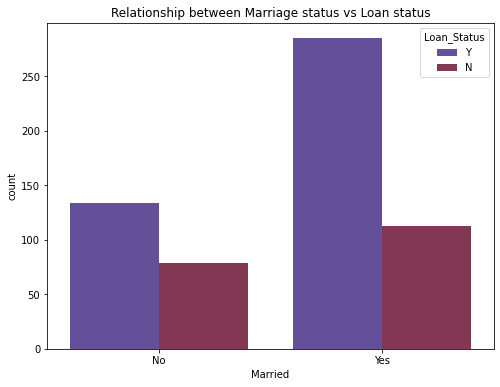

In [209]:
plt.figure(figsize=(8,6), facecolor='white')
sns.countplot(x='Married',hue='Loan_Status', data=df, palette='twilight')
plt.title('Relationship between Marriage status vs Loan status')
plt.show()

The highest number of applicants who are married have got approved than that of unmarried.

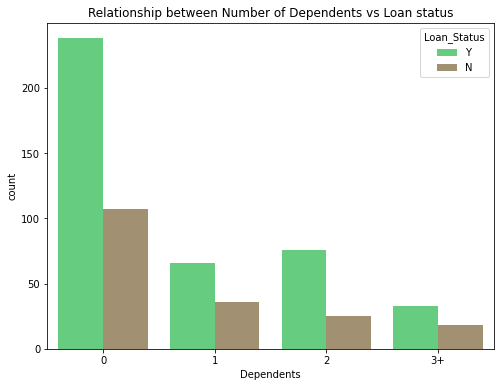

In [208]:
plt.figure(figsize=(8,6), facecolor='white')
sns.countplot(x='Dependents',hue='Loan_Status', data=df, palette='terrain')
plt.title('Relationship between Number of Dependents vs Loan status')
plt.show()

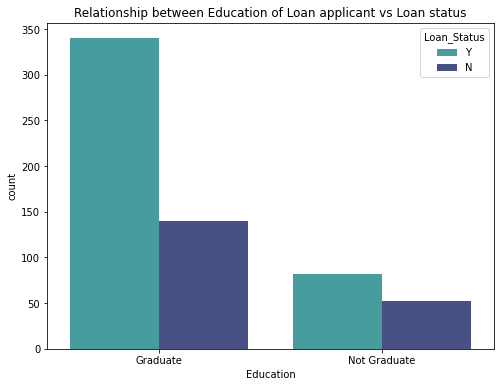

In [234]:
plt.figure(figsize=(8,6), facecolor='white')
sns.countplot(x='Education',hue='Loan_Status', data=df, palette='mako_r')
plt.title('Relationship between Education of Loan applicant vs Loan status')
plt.show()

Applicants with zero dependents, who are graduate have higher chance of loan approval.

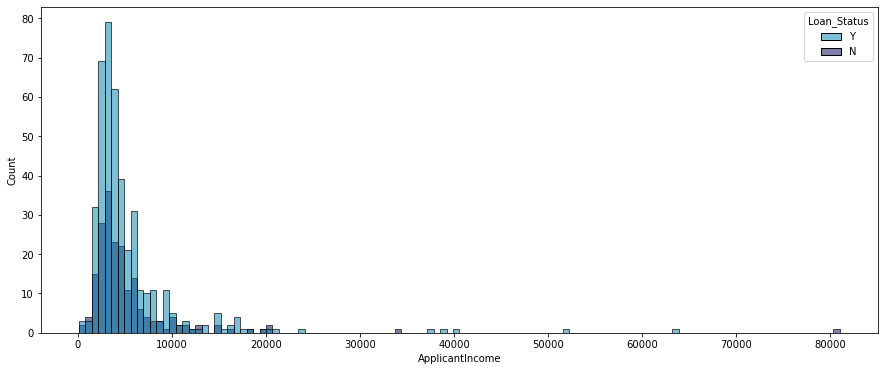

In [187]:
plt.figure(figsize=(15,6), facecolor='white')
sns.histplot(x='ApplicantIncome',hue='Loan_Status', data=df, palette='ocean_r')
plt.title('Relationship between Applicant Income vs Loan status')
plt.show()

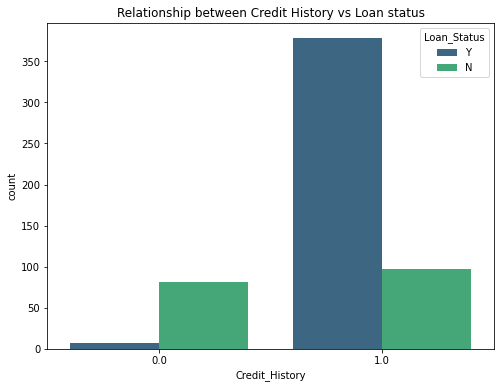

In [211]:
plt.figure(figsize=(8,6), facecolor='white')
sns.countplot(x='Credit_History',hue='Loan_Status', data=df, palette='viridis')
plt.title('Relationship between Credit History vs Loan status')
plt.show()

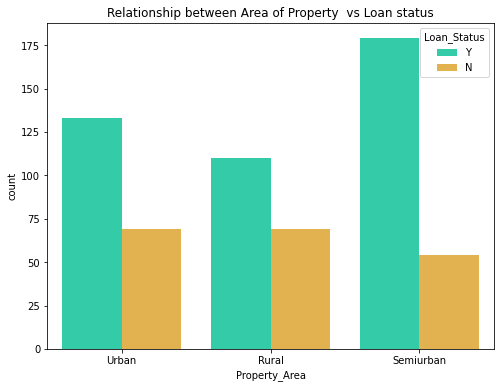

In [212]:
plt.figure(figsize=(8,6), facecolor='white')
sns.countplot(x='Property_Area',hue='Loan_Status', data=df, palette='turbo')
plt.title('Relationship between Area of Property  vs Loan status')
plt.show()

Applicants with property in Semi-urban area, with salary averaging around 10K are likely to have positive loan status.

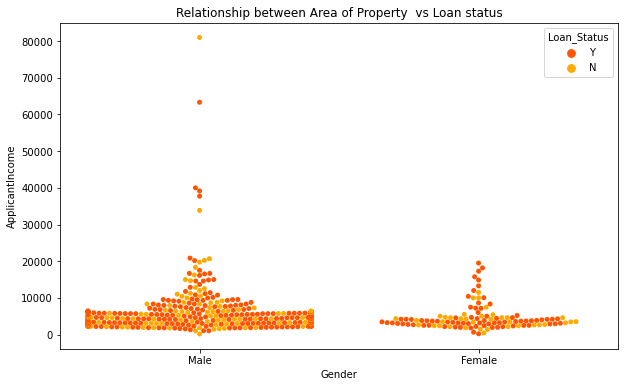

In [221]:
plt.figure(figsize=(10,6), facecolor='white')
sns.swarmplot(y='ApplicantIncome',x='Gender' ,hue='Loan_Status', data=df, palette='autumn')
plt.title('Relationship between Application Income  vs Gender with Loan status as hue ')

plt.show()

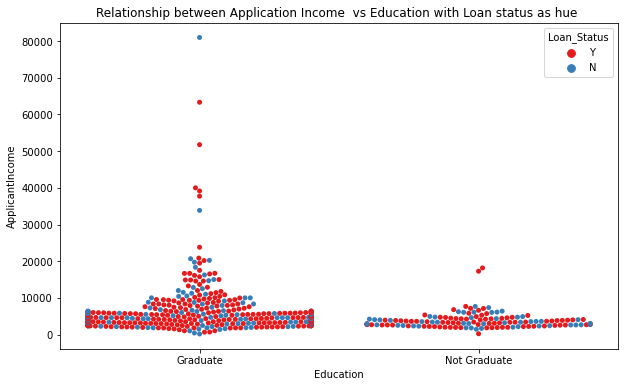

In [230]:
plt.figure(figsize=(10,6), facecolor='white')
sns.swarmplot(y='ApplicantIncome',x='Education' ,hue='Loan_Status', data=df, palette='Set1')
plt.title('Relationship between Application Income  vs Education with Loan status as hue ')

plt.show()

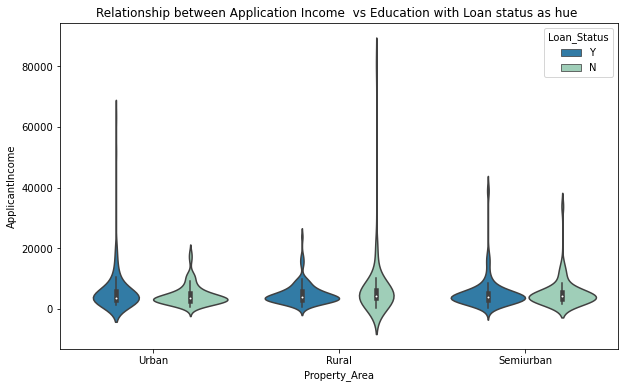

In [229]:
plt.figure(figsize=(10,6), facecolor='white')
sns.violinplot(y='ApplicantIncome',x='Property_Area' ,hue='Loan_Status', data=df, palette='YlGnBu_r')
plt.title('Relationship between Application Income  vs Education with Loan status as hue ')

plt.show()

## Observations:

1. There is average Income of applicants has varied in around 5K-10K with positive loan status.
2. Vert few number of female who have applied for loan have salary more than 20K.

<Figure size 720x432 with 0 Axes>

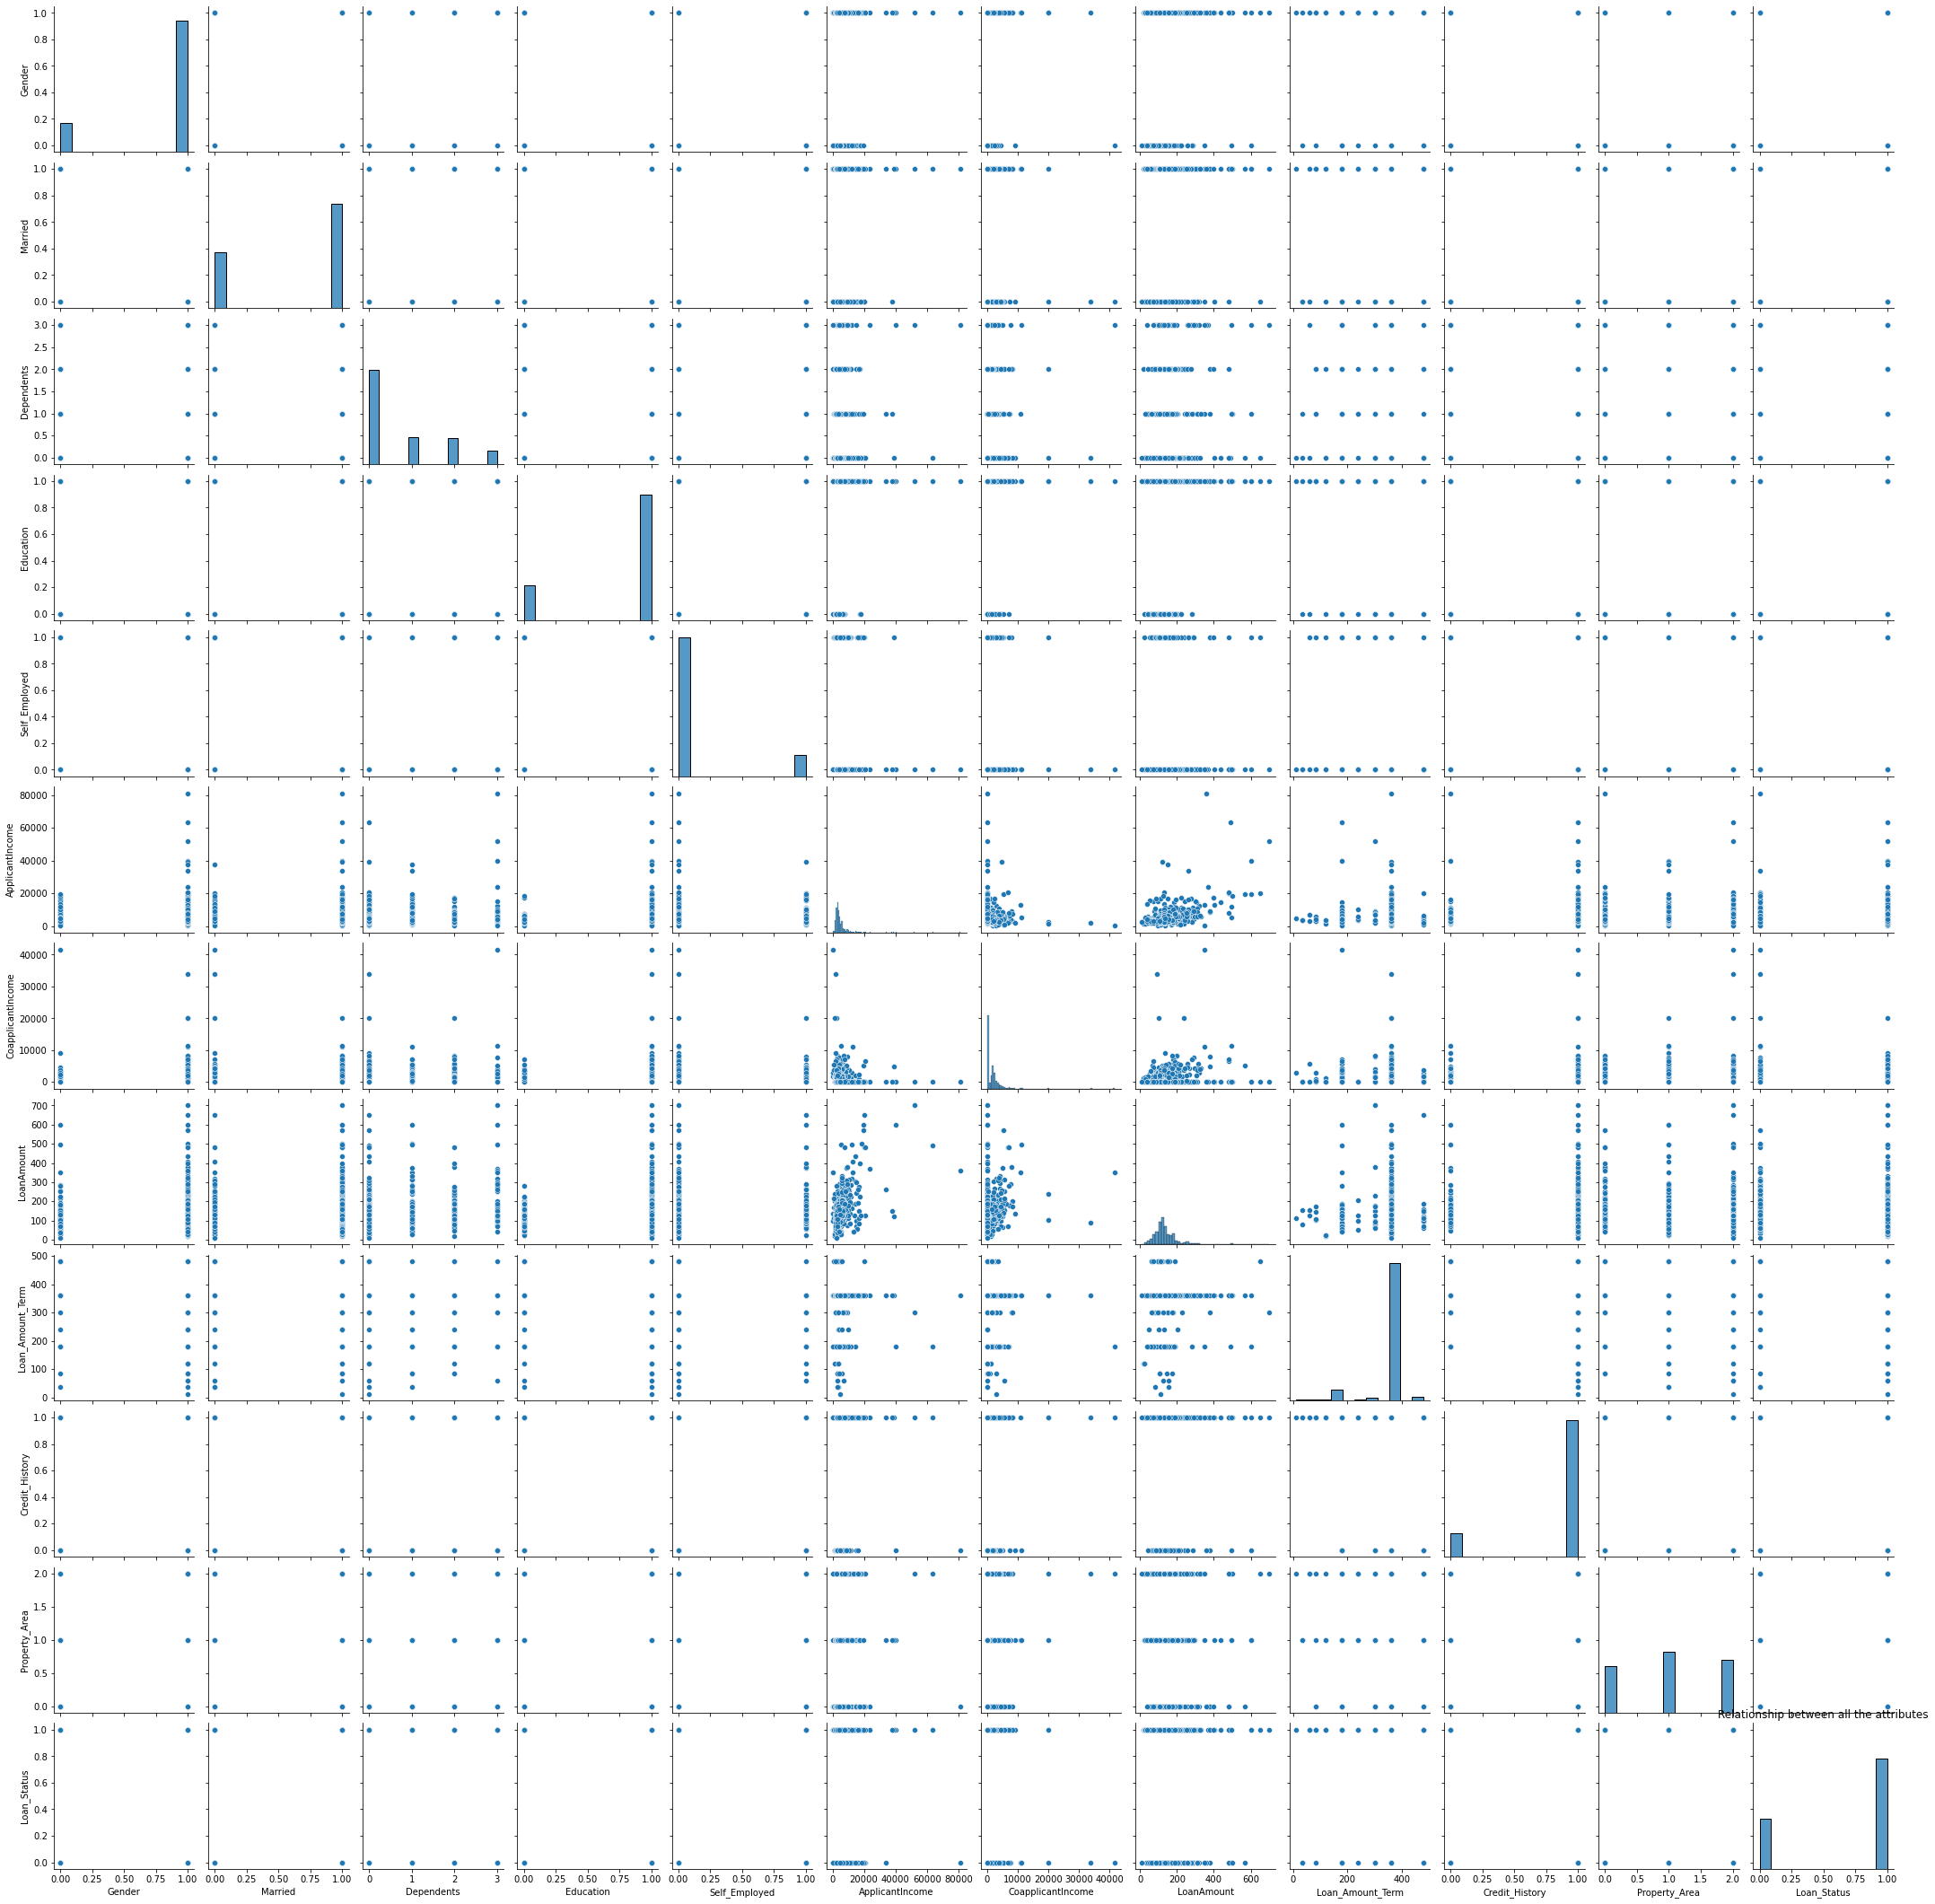

In [294]:
plt.figure(figsize=(10,6), facecolor='white')
sns.pairplot(df)
plt.title('Relationship between all the attributes')

plt.show()

In [4]:
#replacing male and female in Gender by 1 and 0
df['Gender'] = df['Gender'].replace({'Male':1, 'Female':0})

#replacing Yes and No in Married by 1 and 0
df['Married'] = df['Married'].replace({'Yes':1, 'No':0})

#replacing Graduate and Not Graduate in Education by 1 and 0
df['Education'] = df['Education'].replace({'Graduate':1, 'Not Graduate':0})

#replacing Y and N in Loan_Status by 1 and 0
df['Loan_Status'] = df['Loan_Status'].replace({'Y':1, 'N':0})

#replacing Yes and No in Self_Employed by 1 and 0
df['Self_Employed'] = df['Self_Employed'].replace({'Yes':1, 'No':0})

#replacing Rural,Semiurban,Urban in Property_Area by 0, 1, 2
df['Property_Area'] = df['Property_Area'].replace({'Rural':0, 'Semiurban':1,'Urban':2})

#replacing '3+' in Dependents by 3 for convineince
df['Dependents'] = df['Dependents'].replace({'3+':3, '0':0, '1':1,'2':2})

In [287]:
df.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

We have converted all the categorical values into numerical we need to handle null values. As loan_ID is individual parameter, we can drop the column. 

Filling the null values with median values of each columns

In [5]:
df.drop(columns='Loan_ID', inplace=True)
df.fillna(df.median(), inplace=True)

df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

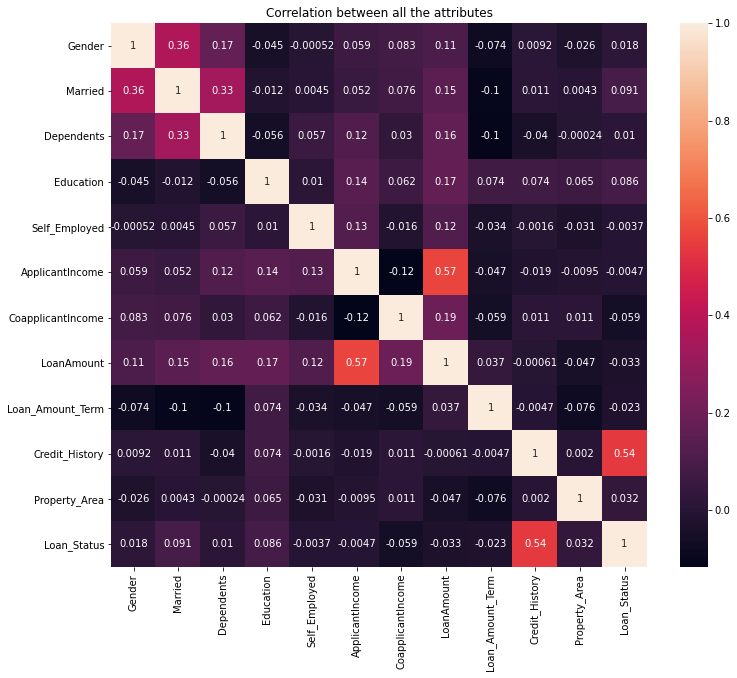

In [300]:
corr=df.corr()
plt.figure(figsize=(12,10), facecolor='white')
sns.heatmap(corr, annot=True)
plt.title('Correlation between all the attributes')
plt.show()

1. There is no much correlation between the attributes as seen by heatmap.
2. All the null values has been treated, and data is converted into numerical attributes clean.
3. Let us check for outliers and skewness of the data present.

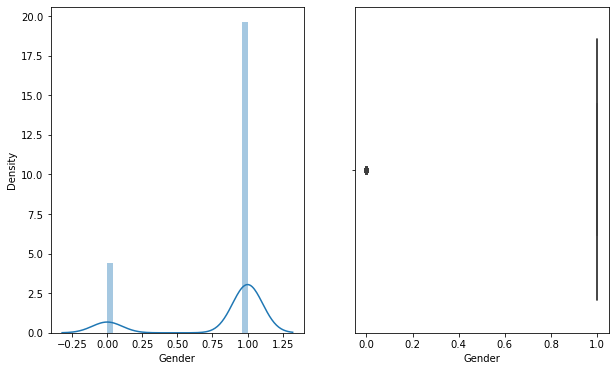

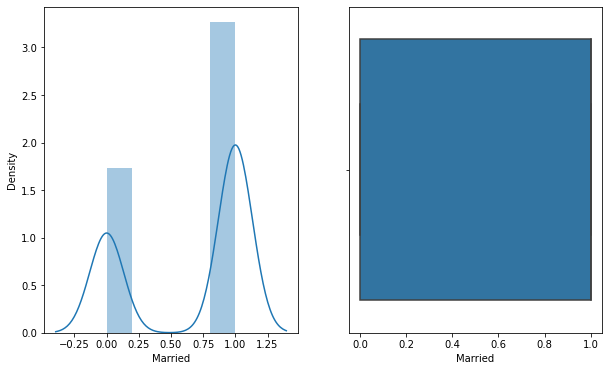

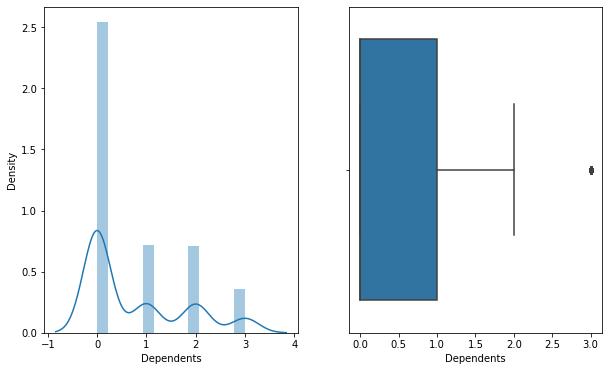

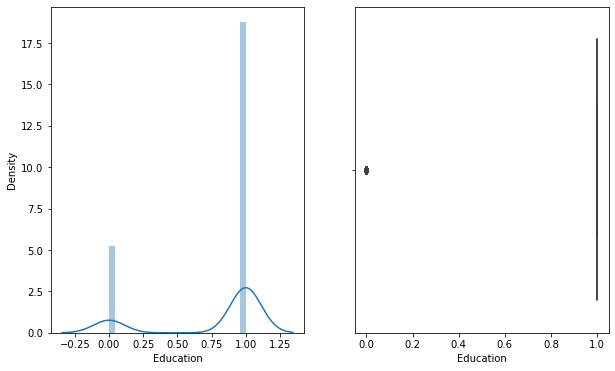

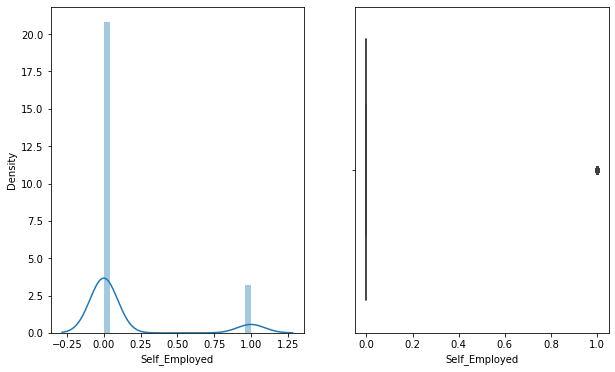

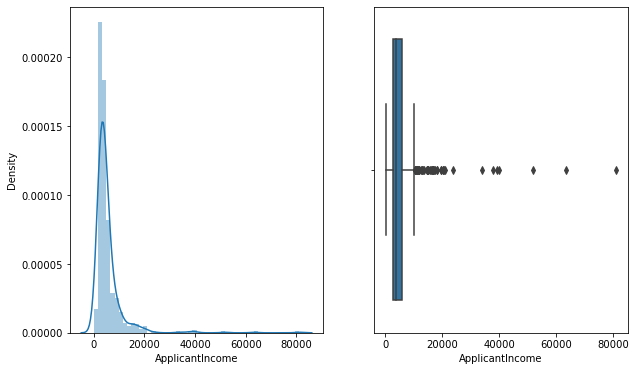

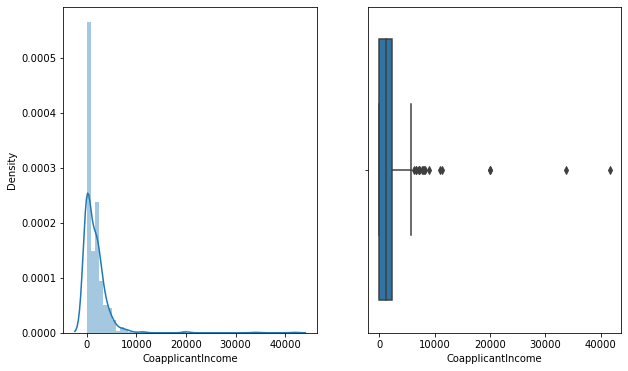

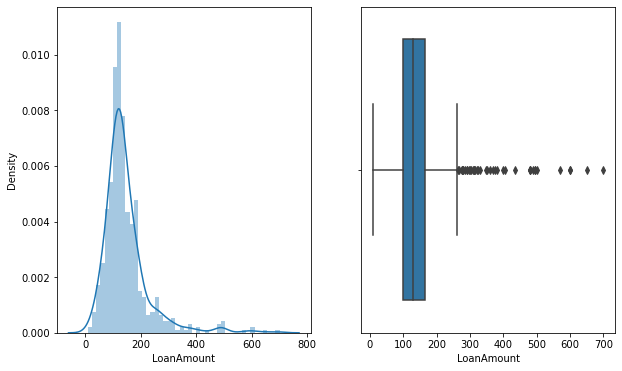

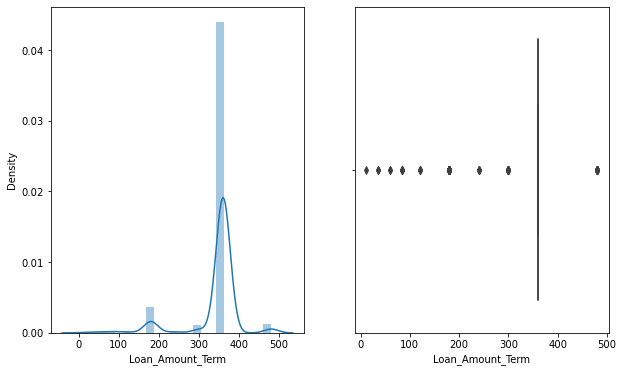

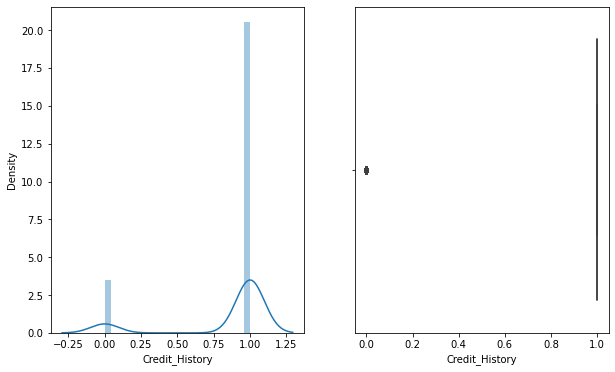

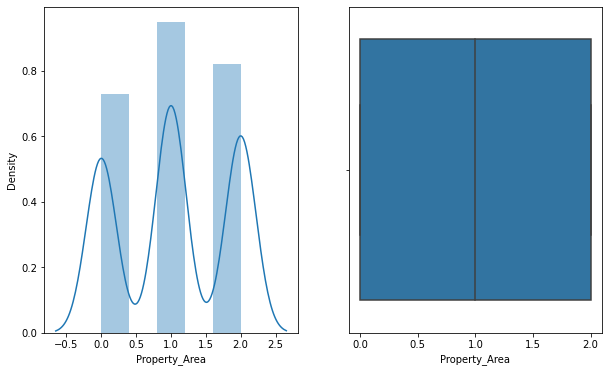

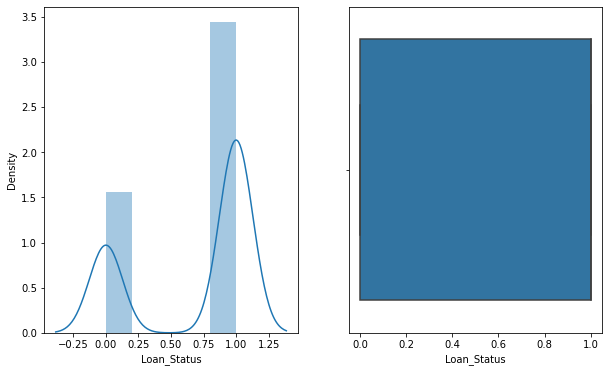

In [313]:
for i in df.columns:
    plt.figure(figsize=(10,6))
    ax = plt.subplot(1,2,1)
    sns.distplot(df[i])

    ax = plt.subplot(1,2,2)
    sns.boxplot(df[i])
plt.show()

In [314]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education           -1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [6]:
z_score =zscore(df[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
abs_zscore = np.abs(z_score)

filtr = (abs_zscore<3).all(axis=1)
df = df[filtr]

We had outliers in Applicant Income, Coapplicant income, Loan amount, Using z-score method we have removed outliers. We are good to proceed with next steps, Balancing the dataset.


## Model Building

In [7]:
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

scalar = StandardScaler()
X_scalar = scalar.fit_transform(X)

print('Before sampling \n',X_scalar.shape)
print('Before sampling \n',y.value_counts())

ran_samp = RandomOverSampler()
X_scalar, y  = ran_samp.fit_resample(X_scalar,y)

print('After sampling \n',X_scalar.shape)
print('After sampling \n',y.value_counts())

Before sampling 
 (589, 11)
Before sampling 
 1    407
0    182
Name: Loan_Status, dtype: int64
After sampling 
 (814, 11)
After sampling 
 0    407
1    407
Name: Loan_Status, dtype: int64


In [332]:
#Selecting best random state
max_acc = 0
max_RS = 0
i=1
for i in range(2, 200):
    models= [LogisticRegression()]
    X_train, X_test, y_train, y_test = train_test_split(X_scalar,y, test_size=0.25, random_state=i)
    for j in models:
        j.fit(X_train,y_train)
    predict = j.predict(X_test)
    acc = accuracy_score(y_test, predict)
    if acc>max_acc:
        max_acc = acc
        max_RS=i
        model = j
        i+=1
print('Max accuracy:',max_acc,'for',model ,'model and random state of', max_RS)

Max accuracy: 0.7892156862745098 for LogisticRegression() model and random state of 22


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scalar,y, test_size=0.25, random_state=22)

## 1. Logistic Regression

In [337]:
Log_reg = LogisticRegression()
Log_reg.fit(X_train, y_train)
y_pred = Log_reg.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))
print("\n The ROC AUC score of Model :", roc_auc_score(y_test,y_pred))


CV=cross_val_score(Log_reg,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))

      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.7892156862745098

 The ROC AUC score of Model : 0.7892156862745099

 The CV score of Model : 0.7081967213114755

 The confusion Matrix :
  [[63 39]
 [ 4 98]]

 The classification report:
                precision    recall  f1-score   support

           0       0.94      0.62      0.75       102
           1       0.72      0.96      0.82       102

    accuracy                           0.79       204
   macro avg       0.83      0.79      0.78       204
weighted avg       0.83      0.79      0.78       204

*******************************************


## 2. Decision Tree Classifier

In [338]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred = dec_tree.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))
print("\n The ROC AUC score of Model :", roc_auc_score(y_test,y_pred))


CV=cross_val_score(dec_tree,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))

      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.8480392156862745

 The ROC AUC score of Model : 0.8480392156862745

 The CV score of Model : 0.821311475409836

 The confusion Matrix :
  [[90 12]
 [19 83]]

 The classification report:
                precision    recall  f1-score   support

           0       0.83      0.88      0.85       102
           1       0.87      0.81      0.84       102

    accuracy                           0.85       204
   macro avg       0.85      0.85      0.85       204
weighted avg       0.85      0.85      0.85       204

*******************************************


## 3. Gausian NB Classifier

In [339]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))
print("\n The ROC AUC score of Model :", roc_auc_score(y_test,y_pred))


CV=cross_val_score(gnb,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))

      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.7549019607843137

 The ROC AUC score of Model : 0.7549019607843137

 The CV score of Model : 0.7032786885245901

 The confusion Matrix :
  [[58 44]
 [ 6 96]]

 The classification report:
                precision    recall  f1-score   support

           0       0.91      0.57      0.70       102
           1       0.69      0.94      0.79       102

    accuracy                           0.75       204
   macro avg       0.80      0.75      0.75       204
weighted avg       0.80      0.75      0.75       204

*******************************************


## 4. Adaboost Classifier

In [340]:
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))
print("\n The ROC AUC score of Model :", roc_auc_score(y_test,y_pred))


CV=cross_val_score(ada_clf,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))

      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.7892156862745098

 The ROC AUC score of Model : 0.7892156862745099

 The CV score of Model : 0.6983606557377049

 The confusion Matrix :
  [[75 27]
 [16 86]]

 The classification report:
                precision    recall  f1-score   support

           0       0.82      0.74      0.78       102
           1       0.76      0.84      0.80       102

    accuracy                           0.79       204
   macro avg       0.79      0.79      0.79       204
weighted avg       0.79      0.79      0.79       204

*******************************************


## 5. Bagging Classifier

In [341]:
bag_clf = BaggingClassifier()
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))
print("\n The ROC AUC score of Model :", roc_auc_score(y_test,y_pred))


CV=cross_val_score(bag_clf,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))

      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.803921568627451

 The ROC AUC score of Model : 0.8039215686274509

 The CV score of Model : 0.8475409836065573

 The confusion Matrix :
  [[87 15]
 [25 77]]

 The classification report:
                precision    recall  f1-score   support

           0       0.78      0.85      0.81       102
           1       0.84      0.75      0.79       102

    accuracy                           0.80       204
   macro avg       0.81      0.80      0.80       204
weighted avg       0.81      0.80      0.80       204

*******************************************


## 6. Random Forest Classifier

In [9]:
ran_clf = RandomForestClassifier()
ran_clf.fit(X_train, y_train)
y_pred = ran_clf.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))
print("\n The ROC AUC score of Model :", roc_auc_score(y_test,y_pred))


CV=cross_val_score(ran_clf,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))

      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.8872549019607843

 The ROC AUC score of Model : 0.8872549019607843

 The CV score of Model : 0.8786885245901639

 The confusion Matrix :
  [[89 13]
 [10 92]]

 The classification report:
                precision    recall  f1-score   support

           0       0.90      0.87      0.89       102
           1       0.88      0.90      0.89       102

    accuracy                           0.89       204
   macro avg       0.89      0.89      0.89       204
weighted avg       0.89      0.89      0.89       204

*******************************************


Random Forest Classifier has highest CV score, Let us tune the parameters using Randomized search CV to improve the accuracy.

## Hyperparameter Optimization

In [373]:
rand_clf = RandomForestClassifier()
params = {'n_estimators':[20,30,40,50],
          'max_depth':[9,12,14,17,19],
          'min_samples_split':[8,12,15,19],
          'min_samples_leaf':[12,19,25,40]
         }
grid_CV = GridSearchCV(estimator=rand_clf, param_grid=params)
grid_CV.fit(X_train, y_train)
grid_CV.best_params_

{'max_depth': 19,
 'min_samples_leaf': 12,
 'min_samples_split': 15,
 'n_estimators': 20}

In [374]:
ran_clf_cv = RandomForestClassifier(n_estimators=20, max_depth=19,min_samples_leaf=12, min_samples_split=15, n_jobs=2)
ran_clf_cv.fit(X_train,y_train)

y_pred = ran_clf_cv.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))


CV=cross_val_score(ran_clf_cv,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
print("\n roc_auc_score: ",roc_auc_score(y_test,y_pred))
      
      
print("*******************************************")


******************RESULTS******************

 The accuracy score of Model : 0.8235294117647058

 The CV score of Model : 0.7032786885245901

 The confusion Matrix :
  [[74 28]
 [ 8 94]]

 The classification report:
                precision    recall  f1-score   support

           0       0.90      0.73      0.80       102
           1       0.77      0.92      0.84       102

    accuracy                           0.82       204
   macro avg       0.84      0.82      0.82       204
weighted avg       0.84      0.82      0.82       204


 roc_auc_score:  0.8235294117647058
*******************************************


## Observations:
1. We see that out of several models trained we got, Random Forest Classifier model has highest CV score = 87.86%
2. After model Hyperparameter tuning of the model we could not see improvement in the accuracy, Hence we are saving the random forest classifier model as best model.
3. We can visualize the area under curve for different models so that we can check which model is performing better.

<Figure size 1080x576 with 0 Axes>

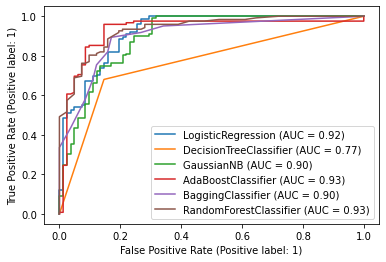

In [387]:
plt.figure(figsize=(15,8), facecolor='white')
show = plot_roc_curve(Log_reg,X_test,y_pred)
plot_roc_curve(dec_tree,X_test,y_pred,ax=show.ax_)
plot_roc_curve(gnb,X_test,y_pred,ax=show.ax_)
plot_roc_curve(ada_clf,X_test,y_pred,ax=show.ax_)
plot_roc_curve(bag_clf,X_test,y_pred,ax=show.ax_)
plot_roc_curve(ran_clf,X_test,y_pred,ax=show.ax_)

plt.title('Graph showing Area Under the curve for differnt models')
plt.show()

In [10]:
import pickle
file  = open('Loan Application Status Prediction.pkl', 'wb')

pickle.dump(ran_clf,file)

In [16]:
model = pickle.load(open('Loan Application Status Prediction.pkl','rb'))
pred = model.predict(X_test)

In [21]:
result = pd.DataFrame({'Actual Value':y_test,'Predicted Value':pred})
result

,Actual Value,Predicted Value
773,0,0
360,1,1
311,1,1
67,1,1
372,0,0
...,...,...
209,1,1
30,0,0
150,0,1
242,0,0
